## Python tools for the $\chi^2$ distribution (Hughes & Hase Chapter 8)

In the "Prelude to Chapter 8" notebooks introduced the notion of a $\chi^2$ probability distribution function associated with a data set and an assumed functional model underlying the model. As discussed in H&H Chapter 8.2, the pdf depends on the number of degrees of freedom, $\nu$,
defined in H&H Eq. (8.1) as

$$
\nu = N−{\cal N},
$$

where $N$ is the number of data points, and ${\cal N}$ is the number of ,i>constraints</i>. The number 
of constraints is typically the number of parameters that you are determining with the statistical analysis. In Prelude A, $N=5$ and ${\cal N}=2$, so $\nu_A =5−3=2$; in Prelude B, $N=21$,  and ${\cal N}=3$, so $\nu_B= 21 − 3 
= 18$.

In this notebook I will introduce python tools for working with the $\chi^2$
probability distribution function.


Marty Ligare, August 2020

In [1]:
import numpy as np
from scipy import stats
from scipy import optimize

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

## Basics of the $\chi^2$ distribution (H&H 8.3)

As we have done with other probability distributions, will use statistics functions from the stats sub-module of scipy. Where before we called functions like `stats.norm.pdf()` we will now call `stats.chi2.pdf`. We can make graphs of the pdfs approriate for the data and model of Prelude A and Prelude B as follows:

In [3]:
df = 20
stats.chi2.stats(df)
mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk')
print(mean, var, skew, kurt)

20.0 40.0 0.6324555320336759 0.6


In [4]:
stats.chi2.stats?

### Probability distribution function (pdf)

#### $\chi^2$ pdf for Prelude A

<IPython.core.display.Javascript object>


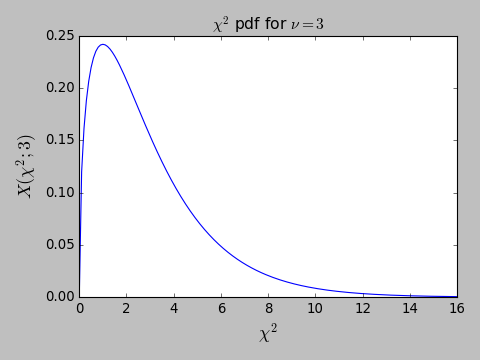

In [5]:
df = 3           # number of degrees of freedom 

plt.figure()
ulim = 16       # upper limit for plot
n = 161         # number of points for plot
x = np.linspace(0,ulim,n)
y = stats.chi2.pdf(x, df)
plt.plot(x, y)
plt.xlabel('$\chi^2$')
plt.ylabel('$X(\chi^2;3)$')
plt.title('$\chi^2$ pdf for $\\nu=3$');

#### $\chi^2$ pdf for Prelude B

<IPython.core.display.Javascript object>


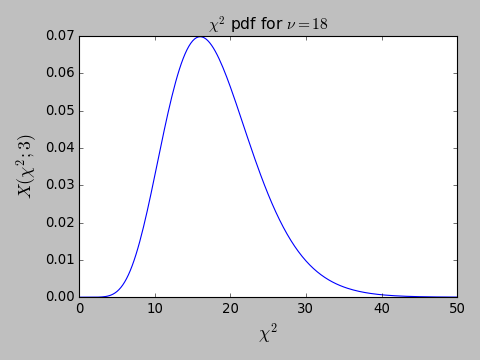

In [6]:
df = 18           # number of degrees of freedom 

plt.figure()
ulim = 50       # upper limit for plot
n = 201         # number of points for plot
x = np.linspace(0,ulim,n)
y = stats.chi2.pdf(x, df)
plt.plot(x, y)
plt.xlabel('$\chi^2$')
plt.ylabel('$X(\chi^2;3)$')
plt.title('$\chi^2$ pdf for $\\nu=18$');

## Cumulative distribution function (cdf)

<b>NOTE:</b> H&H's nomenclature is not the standard one.  For example, in Fig. 8.4, they call what's on the 
vertical the "cumulative probability distribution function", and give it the symbol $P$.  This is what most 
other references, as well as the `stats` sub-module of `scipy` call this one minus the cumulative distribution 
function, i.e.,

$$ 
P \mbox{ (of H&H)}  = 1 - C_{DF},
$$

where $C_{DF}$ is what most people call the <i>cumulative distribution function</i>. 

These are just names, but be careful.



<IPython.core.display.Javascript object>


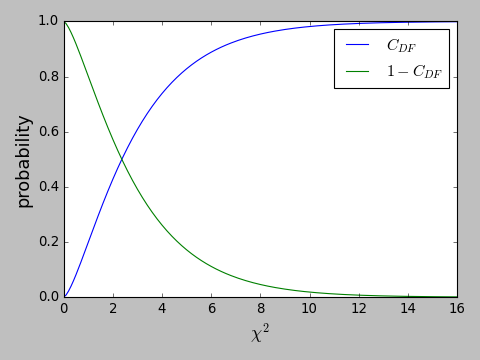

In [7]:
df = 3          # number of degrees of freedom 

plt.figure()
ulim = 16       # upper limit for plot
n = 161         # number of points for plot
x = np.linspace(0,ulim,n)
y1 = stats.chi2.cdf(x, df)
y2 =  1 - stats.chi2.cdf(x, df)
plt.plot(x, y1, label='$C_{DF}$')
plt.plot(x, y2, label='$1-C_{DF}$')
plt.xlabel('$\chi^2$')
plt.ylabel('probability')
plt.legend();

#### Using the cdf for Prelude A

The `curve_fit` function found a minimum value of $\chi^2 =3.70$.

The probability of obtaining a value of $\chi^2$ greater than this for a 
model with 3 degrees of freedom can be found using the $C_{DF}$:

In [8]:
print(1 - stats.chi2.cdf(3.70, 3))

0.29573403237527585


This is consistent with the probabilities found in the simulations.

#### Using the cdf for Prelude B

The `curve_fit`` function found a minimum value of $\chi^2 =21.5$.

The probability of obtaining a value of $\chi^2$ greater than this for a 
model with 18 degrees of freedom can be found using the $C_{DF}$:

In [9]:
print(1 - stats.chi2.cdf(21.5, 18))

0.25494152539788295


This is consistent with the probabilities found in the simulations.

### Recreating Fig. 8.2

<IPython.core.display.Javascript object>


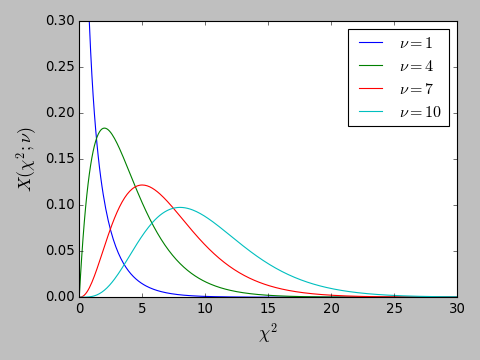

In [10]:
plt.figure()
x = np.linspace(0,30,301)
y1 = stats.chi2.pdf(x,1)
y4 = stats.chi2.pdf(x,4)
y7 = stats.chi2.pdf(x,7)
y10 = stats.chi2.pdf(x,10)
plt.plot(x, y1, label='$\\nu = 1$')
plt.plot(x, y4, label='$\\nu = 4$')
plt.plot(x, y7, label='$\\nu = 7$')
plt.plot(x, y10, label='$\\nu = 10$')
plt.legend()
plt.ylim(0,0.3)
plt.xlabel('$\chi^2$')
plt.ylabel('$X(\chi^2;\\nu)$');

<IPython.core.display.Javascript object>


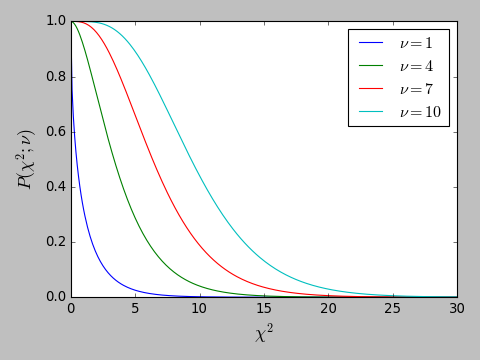

In [11]:
plt.figure()
x = np.linspace(0,30,301)
y1 = 1 - stats.chi2.cdf(x,1)
y4 = 1 - stats.chi2.cdf(x,4)
y7 = 1 - stats.chi2.cdf(x,7)
y10 = 1 - stats.chi2.cdf(x,10)
plt.plot(x, y1, label='$\\nu = 1$')
plt.plot(x, y4, label='$\\nu = 4$')
plt.plot(x, y7, label='$\\nu = 7$')
plt.plot(x, y10, label='$\\nu = 10$')
plt.legend()
plt.ylim(0,1)
plt.xlabel('$\chi^2$')
plt.ylabel('$P(\chi^2;\\nu)$');

## Calculating data in Table 8.1 on p. 107

In [12]:
df = 20 
mean, var = stats.chi2.stats(df, moments='mv')
mean
stats.chi2.cdf(mean + 3*np.sqrt(var), df), (mean + 3*np.sqrt(var))/df

(0.9932821665591967, 1.9486832980505138)

In [13]:
dfs = np.array([5, 10, 20, 30, 50, 100, 500])
for i in range(len(dfs)):
    df = dfs[i]
    mean, var = stats.chi2.stats(df, moments='mv')
    print(df, (mean + 3*np.sqrt(var))/df)

5 2.8973665961010275
10 2.341640786499874
20 1.9486832980505138
30 1.7745966692414834
50 1.6
100 1.4242640687119286
500 1.1897366596101029


#### Version details
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [14]:
%load_ext version_information

In [15]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.8.2003 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Thu Aug 20 18:04:24 2020 EDT